# Extra Credit Assignment: A Game of *Death*!


## Exploratory Data Analysis and Logistic Regression

### 1. Overview

A Game of Thrones is the first novel in A Song of Ice and Fire, a series of fantasy novels by the American author George R. R. Martin. It was later adapted into a television series, which is where most might people know of it from.

While a Game of Thrones became popular for many reasons, one of the themes that attracted many people was the fact that no character was safe from being killed off, no matter how well-liked or central to the story.

Or is that really the case?

In this assignment, I will do an exploratory data analysis on three different datasets, and attempt to create a logisitic regression model to predict character deaths and what factors contribute the most to their impending death.

**Note:** The data used in this analysis has been scraped from the A Song of Ice and Fire books, so there are book spoilers ahead.

### 2. Importing and loading required libraries

In [1]:
#Pandas and Numpy
import pandas as pd 
import numpy as np

#Plotting Libraries
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

#Libraries for the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

### 3. Datasets Used:
There are 3 datasets combined in this analysis with information taken from the books:
1. The first dataset is *battles.csv*, which is a collection of all the battles in the book series. Put together by Chris Albon, it can be found here: https://github.com/chrisalbon/war_of_the_five_kings_dataset
2. The second dataset is *character-deaths.csv*, created as part of a Bayesian Survival Analysis done by Erin Pierce and Ben Kahle, which can be found here: http://allendowney.blogspot.com/2015/03/bayesian-survival-analysis-for-game-of.html
3. Finally, the third dataset is a more detailed character dataset along with predictions on which characters will survive. The dataset was put together by the team at A Song of Ice and Data, details of the machine learning algorithm used to create the prections can be found here: https://got.show/machine-learning-algorithm-predicts-death-game-of-thrones

### 4. Exploratory Data Analysis

#### Defining Functions

Before loading the datasets, we will first define the functions to be used.

In [2]:
#Reading the dataset
def read_dataset(df):
    print("\nThere are", df.shape[0], "rows and", df.shape[1], "columns in this dataset.")
    print("\nThe first five rows are:")
    display(df.head())
    print("\nColumn types:\n")
    print(df.dtypes)

In [3]:
#Plotting NaN values
def nan_plot(df):
    nans = df.isna().sum()
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('Count', fontsize=15)
    ax.set_xlabel('Columns', fontsize=15)
    plt.xticks(rotation='vertical')
    ax.bar(df.columns, nans, color='darkseagreen')
    plt.title('Number of NaNs per column', fontsize=20)
    plt.show()

In [4]:
#Plotting counts of variables
def count_plot(data, xlabel, ylabel, title, x=None, hue=None):
    plt.figure(figsize=(15,8))
    sns.countplot(x=x, hue=hue, data=data, palette = 'GnBu')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=20)

#### A. Battles Dataset

First, we will do some exploratory data analysis on the battles dataset. The variables in this dataset are (*taken from Chris Albon's GitHub*):
- **name**: String variable. The name of the battle.
- **year**: Numeric variable. The year of the battle.
- **battle_number**: Numeric variable. A unique ID number for the battle.
- **attacker_king**: Categorical. The attacker's king. A slash indicators that the king changes over the course of the war. For example, "Joffrey/Tommen Baratheon" is coded as such because one king follows the other in the Iron Throne.
- **defender_king**: Categorical variable. The defender's king.
- **attacker_1 -> attacker_4**: String variable. Major house attacking.
- **defender_1 -> defender_4**: String variable. Major house defending.
- **attacker_outcome**: Categorical variable. The outcome from the perspective of the attacker. Categories: win, loss, draw.
- **battle_type**: Categorical variable. A classification of the battle's primary type. Categories:
    - *pitched_battle*: Armies meet in a location and fight. This is also the baseline category.
    - *ambush*: A battle where stealth or subterfuge was the primary means of attack.
    - *siege*: A prolonged of a fortied position.
    - *razing*: An attack against an undefended position
- **major_death**: Binary variable. If there was a death of a major figure during the battle.
- **major_capture**: Binary variable. If there was the capture of the major figure during the battle.
- **attacker_size**: Numeric variable. The size of the attacker's force. No distinction is made between the types of soldiers such as cavalry and footmen.
- **defender_size**: Numeric variable. The size of the defenders's force. No distinction is made between the types of soldiers such as cavalry and footmen.
- **attacker_commander**: String variable. Major commanders of the attackers. Commander's names are included without honoric titles and commandders are seperated by commas.
- **defender_commander**: String variable. Major commanders of the defender. Commander's names are included without honoric titles and commandders are seperated by commas.
- **summer**: Binary variable. Was it summer?
- **location**: String variable. The location of the battle.
- **region**: Categorical variable. The region where the battle takes place. Categories: Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne
- **note**: String variable. Coding notes regarding individual observations.

Let's load the dataset:

In [5]:
battles = pd.read_csv(r'battles.csv')
read_dataset(battles)


There are 38 rows and 25 columns in this dataset.

The first five rows are:


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,True,False,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",True,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,True,False,NaN,120.0,Gregor Clegane,Beric Dondarrion,True,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,False,True,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",True,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,True,True,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",True,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,True,True,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,True,Whispering Wood,The Riverlands,NaN



Column types:

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death            object
major_capture          object
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                 object
location               object
region                 object
note                   object
dtype: object


Just from a cursory visual inspection, we notice that there are quite a few NaNs. Let's see how many there are per column.

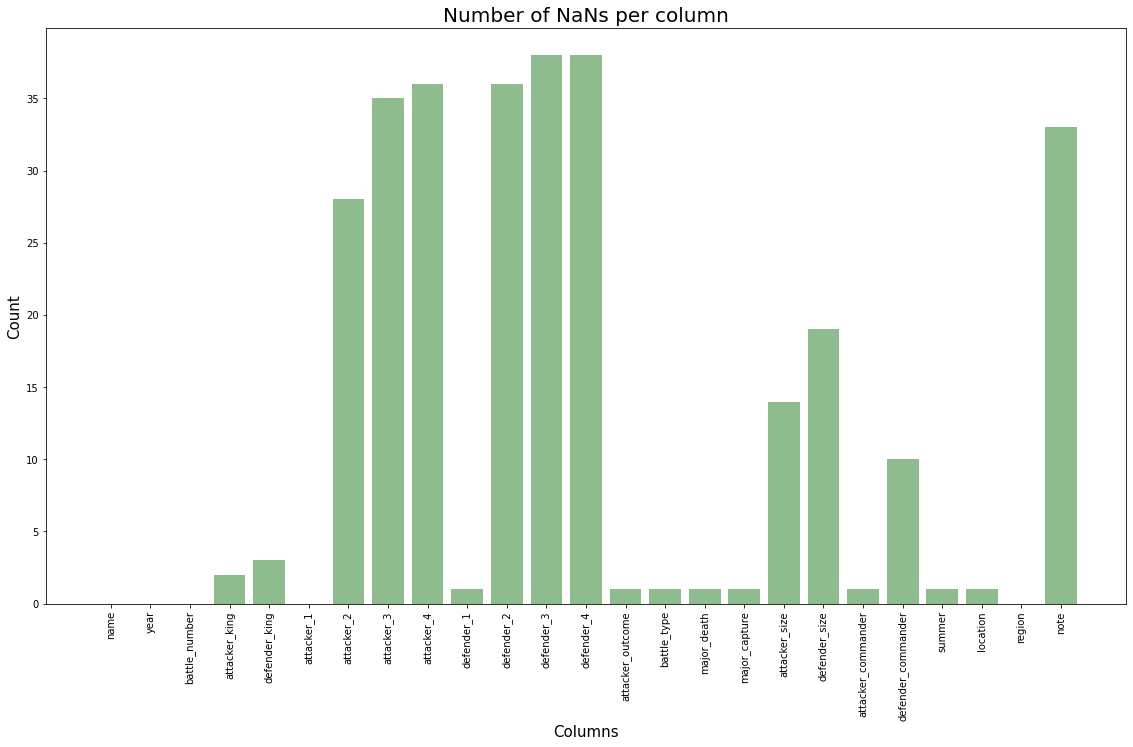

In [6]:
nan_plot(battles)

As we can see, there are quite a few NaNs in this dataset. In this case, removing rows that have NaNs altogether isn't a great idea, because we'd be left with no dataset! We could potentially replace NaNs with 0s, however since each column holds variables of different types, this is also not a great idea (for example, 'defender_size' is a numeric variable, replacing the NaN with 0 would indicate that the defender army had no soldiers). In this case, we will drop columns which are mostly NaNs, and work around the remaining ones.

In [7]:
drop_NaN_cols = ['attacker_2', 'attacker_3', 'attacker_4', 'defender_2', 'defender_3', 'defender_4', 'note']
battles = battles.drop(columns=drop_NaN_cols)
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,True,False,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",True,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,True,False,NaN,120.0,Gregor Clegane,Beric Dondarrion,True,Mummer's Ford,The Riverlands
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,False,True,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",True,Riverrun,The Riverlands
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,True,True,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",True,Green Fork,The Riverlands
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,True,True,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,True,Whispering Wood,The Riverlands


Let's continue exploring the dataset!

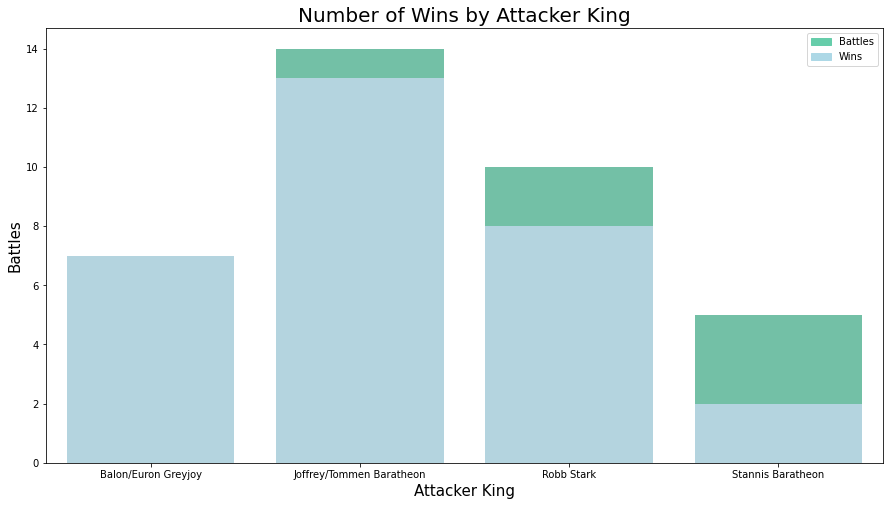

In [8]:
#Creating a df of attacker_outcomes where the outcome is 'win' for each attacker king
b_win = battles.groupby('attacker_king')['attacker_outcome'] \
                .apply(lambda x: (x=='win').sum()) \
                .reset_index(name='wins')

#Creating a df of total battles per each attacker king
b_tot = battles.groupby('attacker_king') \
               .size() \
               .reset_index() \
               .rename(columns={0: 'count'})

#Plotting the barplots
plt.figure(figsize=(15,8))
bar1 = sns.barplot(x="attacker_king",  y="count", data=b_tot, color='mediumaquamarine')
bar2 = sns.barplot(x="attacker_king",  y="wins", data=b_win, color='lightblue')
plt.xlabel('Attacker King', fontsize=15)
plt.ylabel('Battles', fontsize=15)
plt.title('Number of Wins by Attacker King', fontsize=20)


#Legend
top_bar = mpatches.Patch(color='mediumaquamarine', label='Battles')
bottom_bar = mpatches.Patch(color='lightblue', label='Wins')
plt.legend(handles=[top_bar, bottom_bar])

As shown here, the most successful attacking kings in terms of wins per battles fought are **Balon & Euron Greyjoy**, who have won all of the battles they have fought. However, they have fought considerably fewer battles than **Joffrey & Tommen Baratheon**, and **Robb Stark**, in which case the former also have a very successful run, winning 13 of their 14 battles.

The least successful attacking king is **Stannis Baratheon**, with only 2 wins out of his 5 battles.

Overall, the trend appears to be that attacking armies have a higher chance of winning battles. We can calculate this too:

In [9]:
percent_wins = (battles['attacker_outcome'].value_counts()['win'] / 38) * 100
print("\nThe army attacking wins "+ str(round(percent_wins,1))+"% of the times.")


The army attacking wins 84.2% of the times.


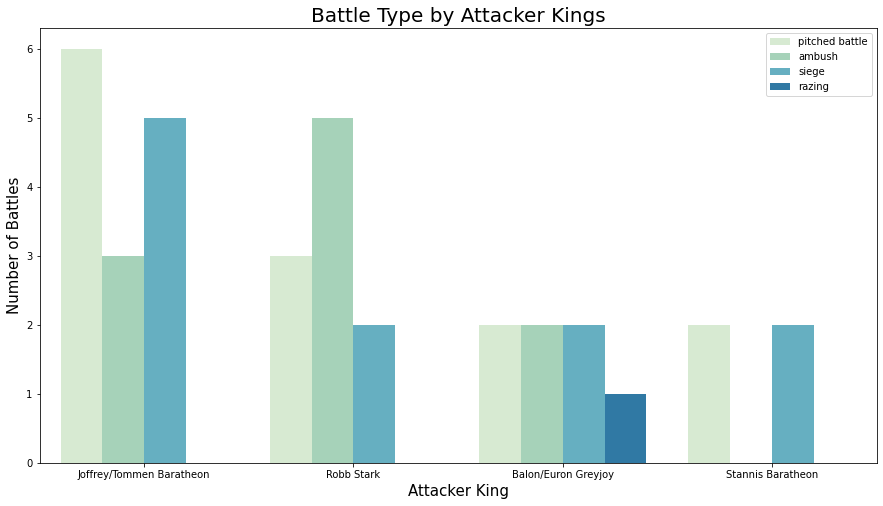

In [10]:
count_plot(battles, 'Attacker King', 'Number of Battles', \
           'Battle Type by Attacker Kings', x='attacker_king', hue='battle_type')

plt.legend(loc='upper right')

Next, we take a look at the type of battles fought by each attacker king, with pitched battles and sieges the battle of choice for all the Baratheons, Robb Stark preferring sieges, and the Greyjoys being the only attacker kings to use razing.

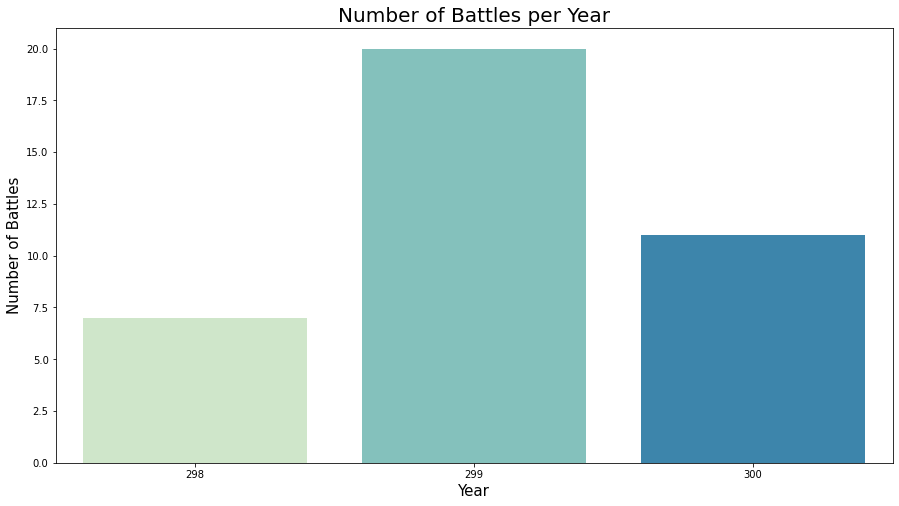

In [11]:
count_plot(battles, 'Year', 'Number of Battles', 'Number of Battles per Year', x='year', hue=None)

In [12]:
#Grouping major_deaths and major_captures by year
year_mdmc = battles.groupby('year')[['major_death','major_capture']] \
                    .sum().reset_index()

#Melting the dataframe for plotting purposes
d_or_c = pd.melt(year_mdmc, \
                 id_vars=['year'], \
                 value_vars=['major_death','major_capture'], \
                 var_name='Deaths or Captures')

print('The DataFrame before melting:\n', year_mdmc, '\n\nThe DataFrame after melting:\n', d_or_c)

The DataFrame before melting:
    year  major_death  major_capture
0   298            4              3
1   299            8              6
2   300            1              2 

The DataFrame after melting:
    year Deaths or Captures  value
0   298        major_death      4
1   299        major_death      8
2   300        major_death      1
3   298      major_capture      3
4   299      major_capture      6
5   300      major_capture      2


Text(0.5, 1.0, 'Major Deaths and Captures by Year')

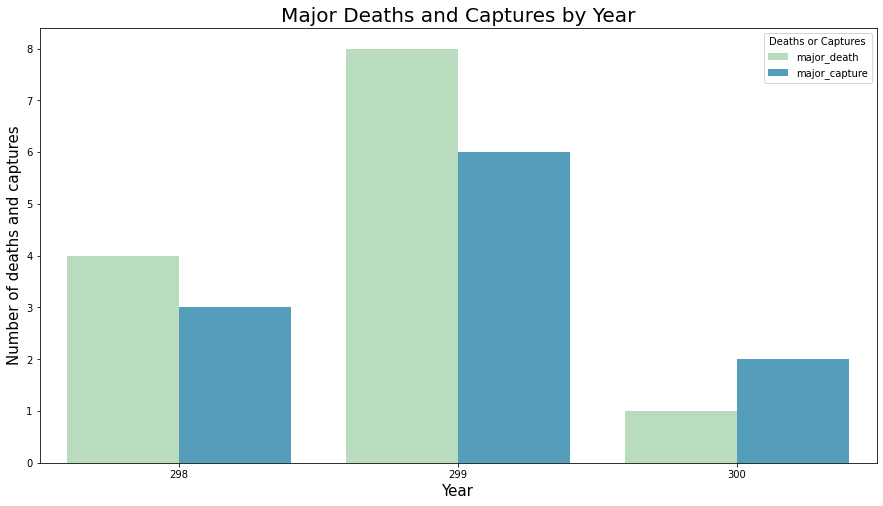

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x="year", y="value", hue="Deaths or Captures", data=d_or_c, palette='GnBu')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of deaths and captures', fontsize=15)
plt.title('Major Deaths and Captures by Year', fontsize=20)

As shown by the two plots above, 299 is the year when most battles were fought, and consequently it is the year that has the most deaths and captures.

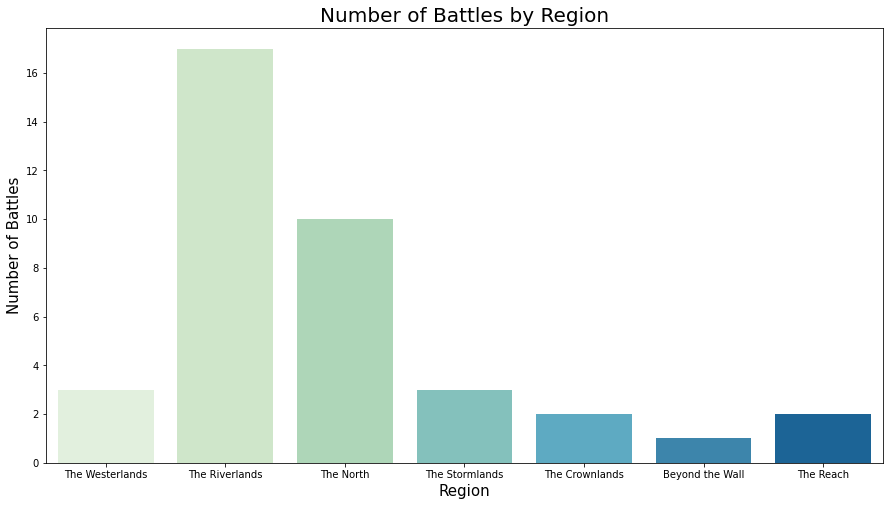

In [14]:
count_plot(battles, 'Region', 'Number of Battles', 'Number of Battles by Region', x='region', hue=None)

We can also look at battles by regions, with The Riverlands having the most battles following by The North, and the fewest battles fought Beyond the Wall.

In [15]:
#Creating a df with only four variables to plot attacker_size and defender_size, as well as battle outcome
battle_size = battles[['name','attacker_size','defender_size', 'attacker_outcome']].dropna()

#Melting the df for plot purposes
a_or_d = pd.melt(battle_size, \
                 id_vars=['name'], \
                 value_vars=['attacker_size','defender_size'], \
                 var_name='Attacker and Defender Size')

print('The DataFrame before melting:\n', battle_size.head(), '\n\nThe DataFrame after melting:\n', a_or_d.head())


The DataFrame before melting:
                             name  attacker_size  defender_size  \
0     Battle of the Golden Tooth        15000.0         4000.0   
2             Battle of Riverrun        15000.0        10000.0   
3       Battle of the Green Fork        18000.0        20000.0   
4  Battle of the Whispering Wood         1875.0         6000.0   
5            Battle of the Camps         6000.0        12625.0   

  attacker_outcome  
0              win  
2              win  
3             loss  
4              win  
5              win   

The DataFrame after melting:
                             name Attacker and Defender Size    value
0     Battle of the Golden Tooth              attacker_size  15000.0
1             Battle of Riverrun              attacker_size  15000.0
2       Battle of the Green Fork              attacker_size  18000.0
3  Battle of the Whispering Wood              attacker_size   1875.0
4            Battle of the Camps              attacker_size   6000.0


Text(0.5, 1.0, 'Attacker and Defender Size by Battle')

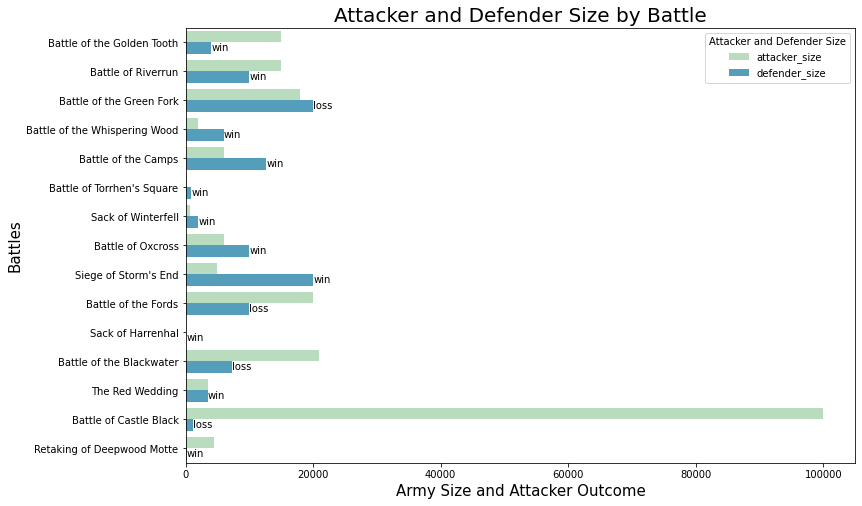

In [16]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="value", y="name", hue="Attacker and Defender Size", data=a_or_d, palette='GnBu')
ax.bar_label(ax.containers[-1], labels=battle_size.attacker_outcome, label_type='edge')
plt.xlabel('Army Size and Attacker Outcome', fontsize=15)
plt.ylabel('Battles', fontsize=15)
plt.title('Attacker and Defender Size by Battle', fontsize=20)

Finally we can see a comparison of the attacking and defending army sizes, and whether that had an impact on the outcome of the battle from the attacker's perspective.

For this comparison, the battles with NaNs for attacker_size or defender_size have been dropped.

Interestingly, the above graph shows that in most cases, the army with the smaller army wins the battle, with 9 of 15 battles shown having been won by the side with the smaller army. The most significant battles have been **Siege of Storm's End**, with the winning army having less than a third of the men of the losing army, and the **Battle of Castle Black**, where the difference is almost 100x!

While we can continue analyzing this dataset further, there are two more datasets to go through. Evidently, we can glean many insights from this small dataset alone.

#### B. Character Deaths Dataset

Next, we will look at the *character-deaths.csv* dataset. The variables are as follows:
- **name**: String variable. Name of the character.	
- **allegiances:** String variable. The house the character is allied with.	
- **death_year:** Numeric variable. The year the character died.	
- **book_of_death:** Numeric variable. The book in which the character died as a number.
- **death_chapter:** Numeric variable. The chapter number in which the character died.
- **book_intro_chapter:** Numeric variable. The chapter number in which the character was introduced.
- **gender:** Boolean variable. The gender of the character (True = Male, False = Female).
- **nobility:** Boolean variable. Whether the character is of noble birth or from a noble house.
- **got:** Boolean variable. Whether the character was present or mentioned in Book 1.
- **cok:** Boolean variable. Whether the character was present or mentioned in Book 2.
- **sos:** Boolean variable. Whether the character was present or mentioned in Book 3.
- **ffc:** Boolean variable. Whether the character was present or mentioned in Book 4.
- **dwd:** Boolean variable. Whether the character was present or mentioned in Book 5.

In [17]:
deaths = pd.read_csv(r'character_deaths.csv')
read_dataset(deaths)


There are 917 rows and 13 columns in this dataset.

The first five rows are:


,name,allegiances,death_year,book_of_death,death_chapter,book_intro_chapter,gender,nobility,got,cok,sos,ffc,dwd
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,True,True,True,True,True,True,False
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,True,True,False,False,True,False,False
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,True,True,False,False,False,False,True
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,True,True,False,False,False,False,True
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,True,True,False,False,True,False,False



Column types:

name                   object
allegiances            object
death_year            float64
book_of_death         float64
death_chapter         float64
book_intro_chapter    float64
gender                   bool
nobility                 bool
got                      bool
cok                      bool
sos                      bool
ffc                      bool
dwd                      bool
dtype: object


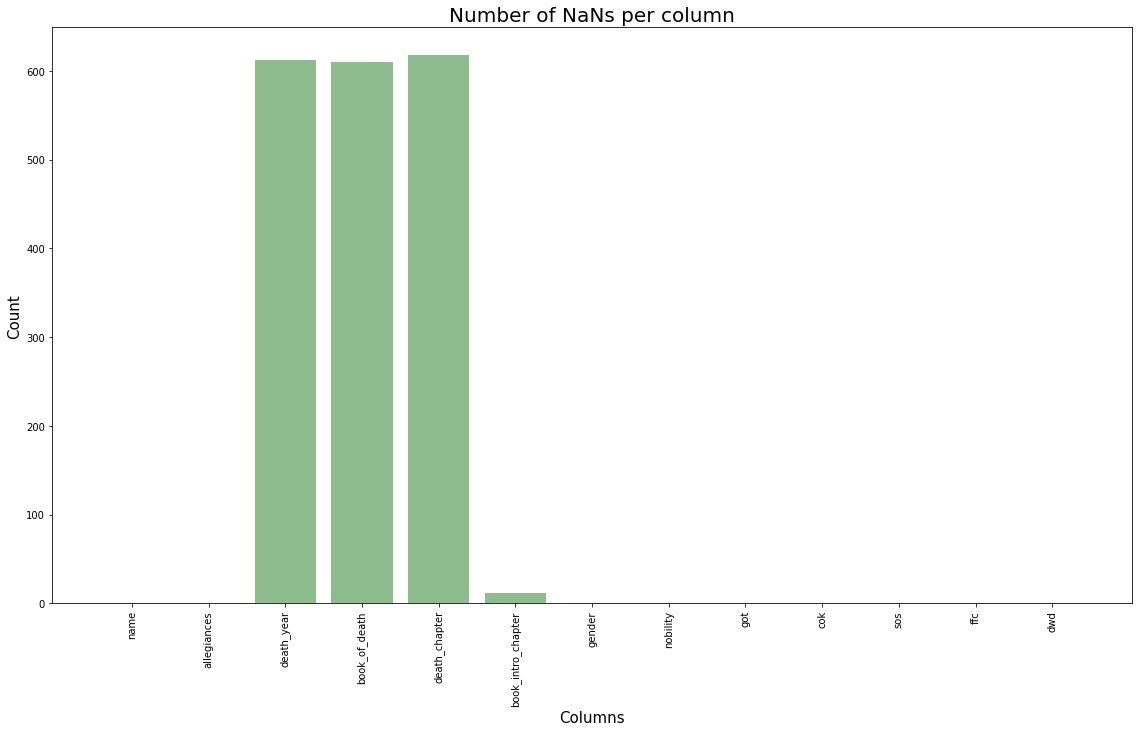

In [18]:
nan_plot(deaths)

As we can see, the columns with the most NaNs are *death_year*, *book_of_death* and *death_chapter*. This is most likely due to the fact that the characters associated with these NaNs are still alive. One option is dropping these columns, however, since our analyses is based on dead characters, we will keep them and work around the NaNs.

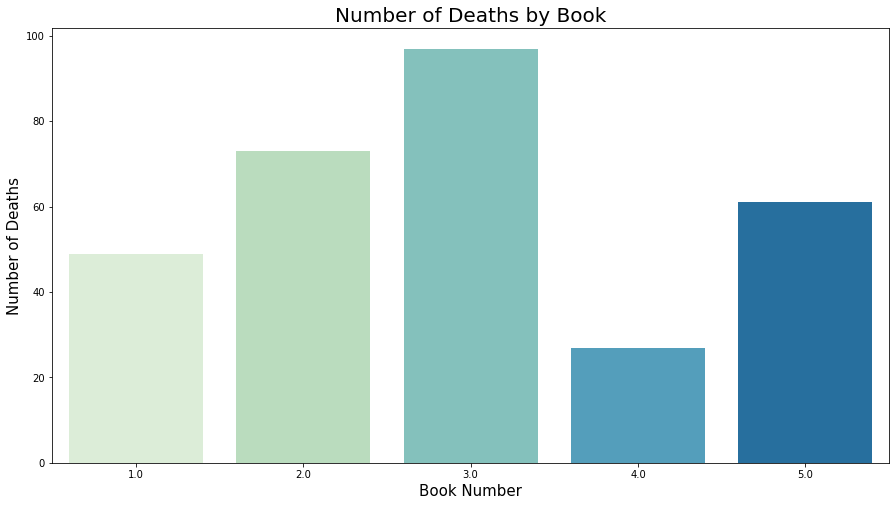

In [19]:
count_plot(deaths, 'Book Number', 'Number of Deaths', 'Number of Deaths by Book', x='book_of_death', hue=None)

According to this plot, the book associated with the most deaths is Book 3. We can also assume that books 2 and 3 might have been set in the year 299, as according to the analysis of the previous dataset, the most battles occurred in that year.

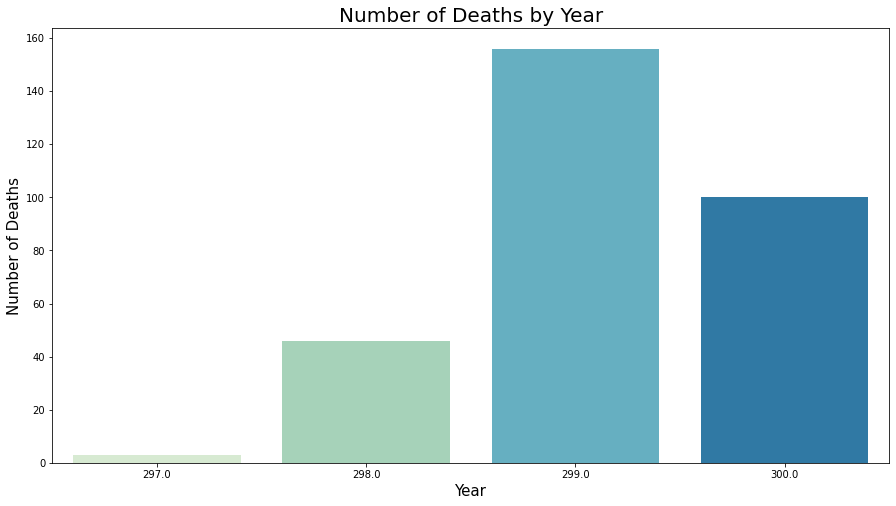

In [20]:
count_plot(deaths, 'Year', 'Number of Deaths', 'Number of Deaths by Year', x='death_year', hue=None)

As expected, the year with the highest number of deaths is the year 299.

<ipython-input-21-beb545bfb0be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_gen['gender'] = np.where(d_gen['gender'] == True, 'Male', 'Female')


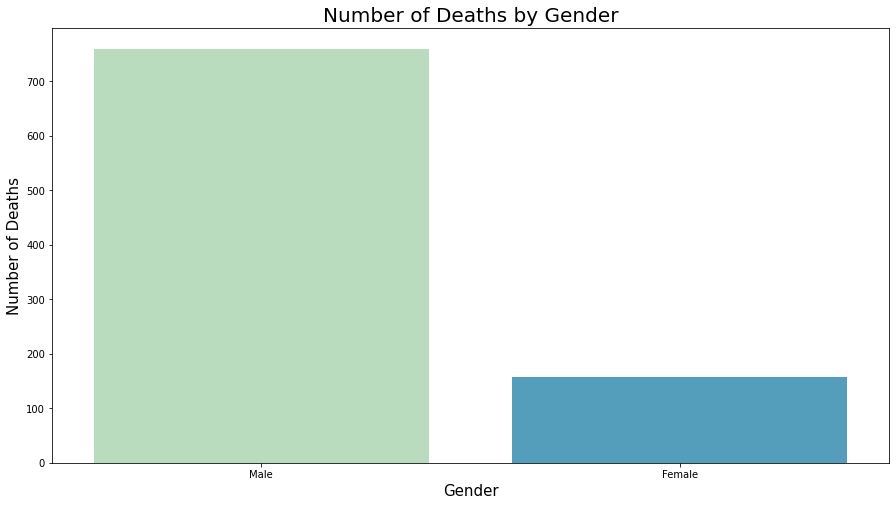

In [21]:
#Creating a new df for genders to rename True and False to Male and Female respectively
d_gen = deaths[['name','gender']]

#The following step creates a warning:
d_gen['gender'] = np.where(d_gen['gender'] == True, 'Male', 'Female')
count_plot(d_gen, 'Gender', 'Number of Deaths', 'Number of Deaths by Gender', x='gender', hue=None)

As shown, the number of deaths vary significantly by gender. We can assume that armies were mostly made up of males.

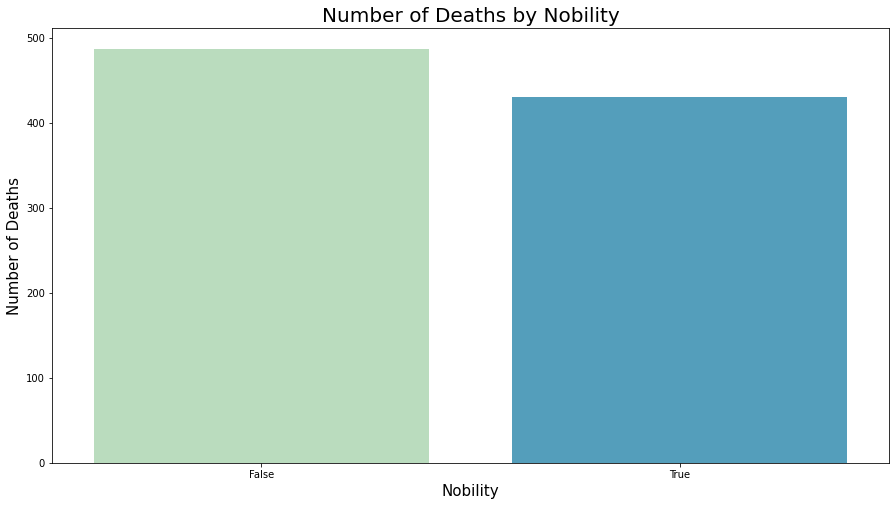

In [22]:
count_plot(deaths, 'Nobility', 'Number of Deaths', 'Number of Deaths by Nobility', x='nobility', hue=None)

According to the above plot, most people who died in the A Song of Ice and Fire universe were not of noble birth, however the difference isn't very disproportionate.

Once again, we can do further analysis into this dataset alone, however since there is one final dataset left, and a logistic regression model to build and analyze, we will continue with the third and final dataset.

#### C. Character Deaths (Predictions) Dataset
Finally, we will look at the *character_predictions_pose.csv* dataset. The variables are as follows:
- **s_no:** Serial number as integer.
- **plod:** Numeric variable. Death predictions by the original team who created the dataset.
- **name:** String variable. Name of the character.
- **title:** String variable. Title of the character.
- **male:** Boolean variable. True if male.
- **culture:** String variable. The culture/race of the character.
- **dateofbirth:** Numeric variable. The character's date of birth.
- **dateofdeath:** Numeric variable. The character's date of death.
- **mother:** String variable. The character's mother's name.
- **father:** String variable. The character's father's name.
- **heir:** String variable. The name of the character's heir.
- **house:** String variable. The house to which the character belongs.
- **spouse:** String variable. The character's spouse's name.
- **book1:** Boolean variable. Whether the character was present or mentioned in Book 1.
- **book2:** Boolean variable. Whether the character was present or mentioned in Book 2.
- **book3:** Boolean variable. Whether the character was present or mentioned in Book 3.
- **book4:** Boolean variable. Whether the character was present or mentioned in Book 4.
- **book5:** Boolean variable. Whether the character was present or mentioned in Book 5.
- **isalivemother:** Boolean value as string variable. Where the character's mother is alive.
- **isalivefather:** Boolean value as string variable. Where the character's father is alive.
- **isaliveheir:** Boolean value as string variable. Where the character's heir is alive.
- **isalivespouse:** Boolean value as string variable. Where the character's spouse is alive.
- **ismarried:** Boolean variable. Whether the character is married.
- **isnoble:** Boolean variable. Whether the character is from a noble house.
- **age:** Numeric variable. The character's age.
- **numdeadrelations:** Integer variable. The number of dead relations the character has.
- **booldeadrelations:** Boolean variable. Whether the character has dead relations.
- **ispopular:** Boolean variable. Whether the character is popular.
- **popularity:** Numeric variable. The character's popularity as a score.
- **isalive:** Boolean variable. Whether the character is alive.

In [23]:
death_preds = pd.read_csv(r'character_predictions_pose.csv')
read_dataset(death_preds)


There are 1946 rows and 30 columns in this dataset.

The first five rows are:


,s_no,plod,name,title,male,culture,dateofbirth,dateofdeath,mother,father,...,isaliveheir,isalivespouse,ismarried,isnoble,age,numdeadrelations,booldeadrelations,ispopular,popularity,isalive
0,1,0.946,Viserys II Targaryen,NaN,True,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,False,NaN,False,False,NaN,11,True,True,0.605351,False
1,2,0.613,Walder Frey,Lord of the Crossing,True,Rivermen,208.0,NaN,NaN,NaN,...,NaN,True,True,True,97.0,1,True,True,0.896321,True
2,3,0.507,Addison Hill,Ser,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,True,NaN,0,False,False,0.267559,True
3,4,0.924,Aemma Arryn,Queen,False,NaN,82.0,105.0,NaN,NaN,...,NaN,False,True,True,23.0,0,False,False,0.183946,False
4,5,0.383,Sylva Santagar,Greenstone,False,Dornish,276.0,NaN,NaN,NaN,...,NaN,True,True,True,29.0,0,False,False,0.043478,True



Column types:

s_no                   int64
plod                 float64
name                  object
title                 object
male                    bool
culture               object
dateofbirth          float64
dateofdeath          float64
mother                object
father                object
heir                  object
house                 object
spouse                object
book1                   bool
book2                   bool
book3                   bool
book4                   bool
book5                   bool
isalivemother         object
isalivefather         object
isaliveheir           object
isalivespouse         object
ismarried               bool
isnoble                 bool
age                  float64
numdeadrelations       int64
booldeadrelations       bool
ispopular               bool
popularity           float64
isalive                 bool
dtype: object


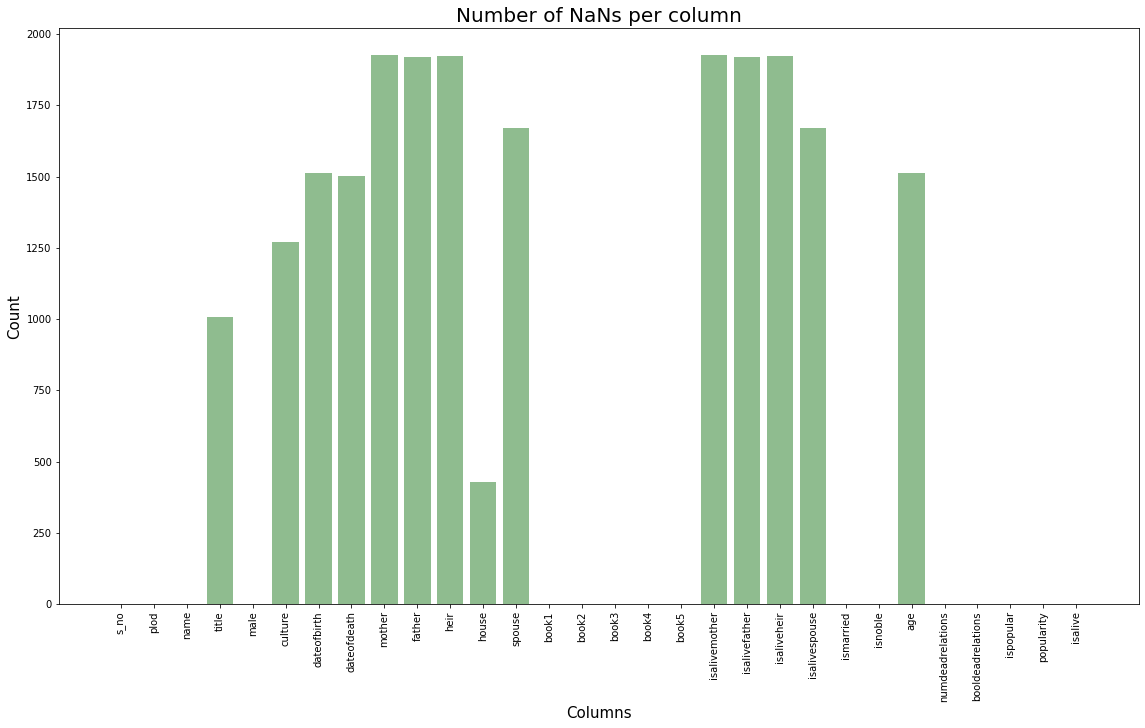

In [24]:
nan_plot(death_preds)

Once again, we will leave the NaNs as is as for the EDA portion of the analysis, in some cases, removing NaN rows or columns will also remove important information.

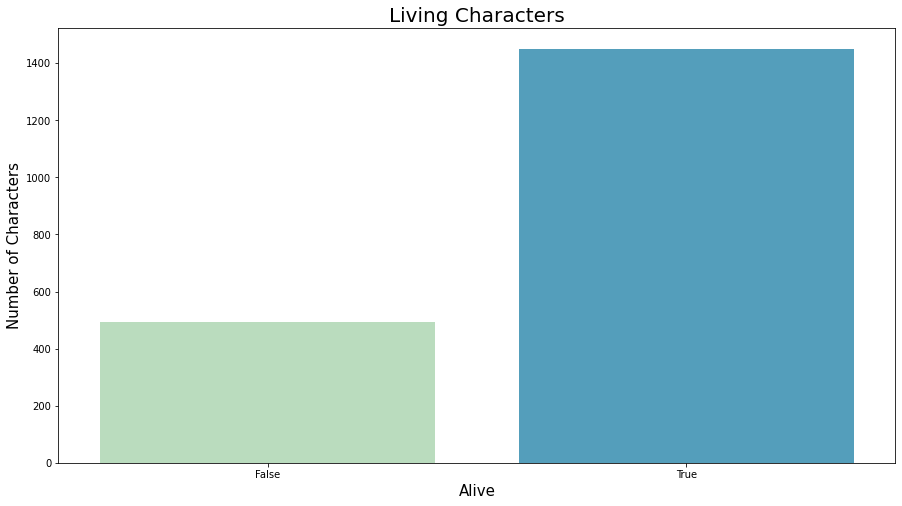

In [25]:
count_plot(death_preds, 'Alive', 'Number of Characters', 'Living Characters', x='isalive', hue=None)

The above plot is of the 'isalive' variable, which will be the response variable in our logistic regression model. As we can see, there are around 500 dead characters and about 3 times as many alive ones. Since there is a data imbalance, ideally we can look into down- or up-sampling our dataset.

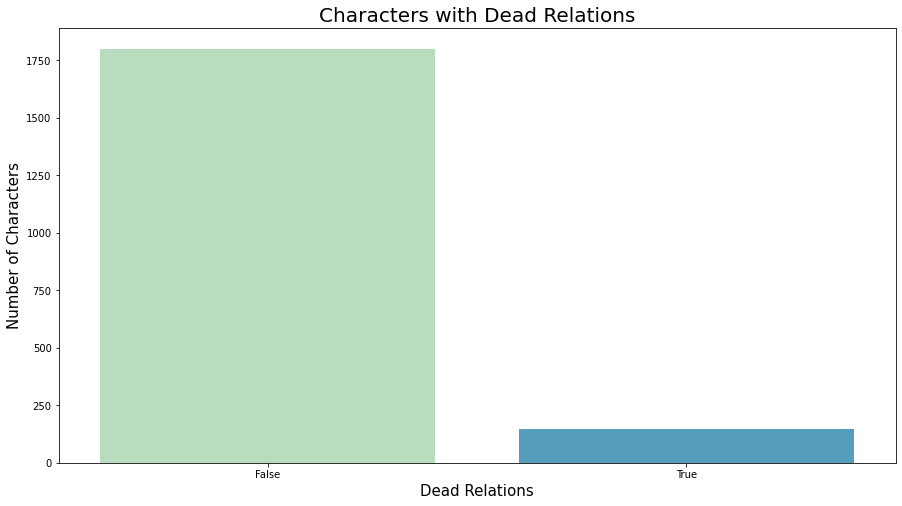

In [26]:
count_plot(death_preds, 'Dead Relations', 'Number of Characters', \
           'Characters with Dead Relations', x='booldeadrelations', hue=None)

The above graph shows the number of characters with dead relations, and as we can see, most characters *do not* have any dead relations.

Let's also take a look at the **Culture** column. This column requires some data cleaning.

In [27]:
print('The unique entries in the "Culture" column are as follows:\n\n', death_preds['culture'].sort_values().unique())

The unique entries in the "Culture" column are as follows:

 ['Andal' 'Andals' 'Asshai' "Asshai'i" 'Astapor' 'Astapori' 'Braavos'
 'Braavosi' 'Crannogmen' 'Dorne' 'Dornish' 'Dornishmen' 'Dothraki'
 'First Men' 'Free Folk' 'Free folk' 'Ghiscari' 'Ghiscaricari' 'Ibbenese'
 'Ironborn' 'Ironmen' 'Lhazareen' 'Lhazarene' 'Lysene' 'Lyseni' 'Meereen'
 'Meereenese' 'Myrish' 'Naathi' 'Northern mountain clans' 'Northmen'
 'Norvos' 'Norvoshi' 'Pentoshi' 'Qarth' 'Qartheen' 'Qohor' 'Reach'
 'Reachmen' 'Rhoynar' 'Riverlands' 'Rivermen' 'Sistermen' 'Stormlander'
 'Stormlands' 'Summer Islander' 'Summer Islands' 'Summer Isles'
 'The Reach' 'Tyroshi' 'Vale' 'Vale mountain clans' 'Valemen' 'Valyrian'
 'Westerlands' 'Westerman' 'Westermen' 'Westeros' 'Wildling' 'Wildlings'
 'free folk' 'ironborn' 'northmen' 'westermen' nan]


As we can see, there are quite a few repeated cultures written in different ways, such as 'Reach', 'Reachmen', and 'The Reach'. We can organize and filter this list by using dictionary mapping.

In [44]:
culture_map = {'Andal': 'Andals', 'Asshai': "Asshai'i", 'Astapor': 'Astapori', 'Braavos': 'Braavosi',
              'Dorne': 'Dornish', 'Dornishmen':'Dornish', 'First Men': 'Wildlings', 'Free Folk': 'Wildlings',
               'Free folk': 'Wildlings', 'free folk': 'Wildlings', 'Ghiscaricari': 'Ghiscari', 'Ironborn': 'Ironmen',
              'ironborn': 'Ironmen', 'Lhazarene': 'Lhazareen', 'Lysene': 'Lyseni', 'Meereen': 'Meereeneese',
               'northmen': 'Northmen', 'Norvos': 'Norvoshi', 'Qarth': 'Qartheen', 'Reach': 'Reachmen',
               'The Reach': 'Reachmen', 'Riverlands': 'Rivermen', 'Stormlands': 'Stormlander',
               'Summer Isles': 'Summer Islander', 'Summer Islands': 'Summer Islander', 'Vale': 'Valemen',
               'Vale mountain clans': 'Valemen', 'Westerlands': 'Westermen', 'Westerman': 'Westermen',
               'westermen': 'Westermen', 'Wildling': 'Wildlings'}

death_preds_copy = death_preds.copy()
death_preds_copy['culture'] = death_preds_copy['culture'].map(culture_map)

print('The updated unique entries in the "Culture" column are as follows:\n\n', \
      death_preds_copy['culture'].sort_values().unique())

The updated unique entries in the "Culture" column are as follows:

 ['Andals' "Asshai'i" 'Astapori' 'Braavosi' 'Dornish' 'Ghiscari' 'Ironmen'
 'Lhazareen' 'Lyseni' 'Meereeneese' 'Northmen' 'Norvoshi' 'Qartheen'
 'Reachmen' 'Rivermen' 'Stormlander' 'Summer Islander' 'Valemen'
 'Westermen' 'Wildlings' nan]


Text(0.5, 1.0, 'Character Deaths by Culture')

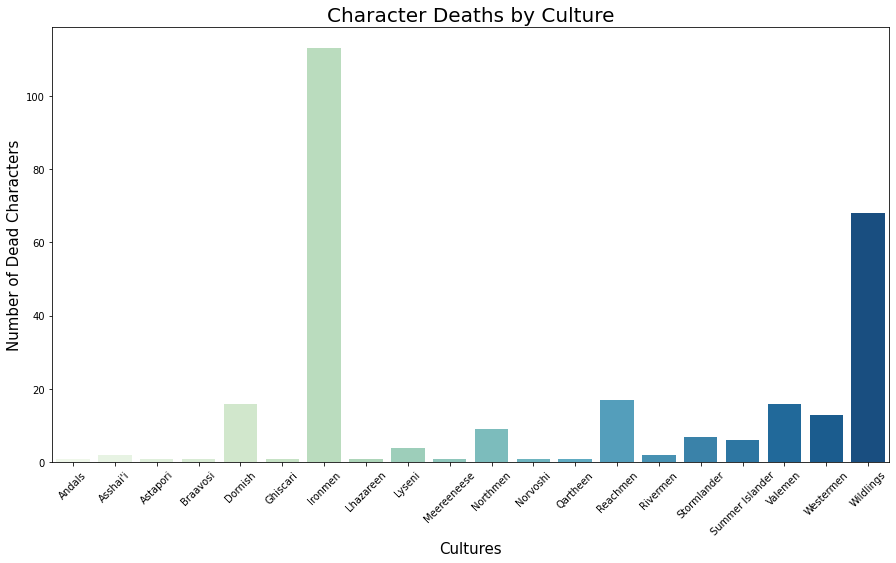

In [45]:
#Grouping character deaths by culture
dead_culture = death_preds_copy.groupby('culture')['isalive'] \
                .apply(lambda x: (x==False).count()) \
                .reset_index(name='isdead')
        
plt.figure(figsize=(15,8))
sns.barplot(x="culture", y="isdead", data=dead_culture, palette='GnBu')
plt.xlabel('Cultures', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Number of Dead Characters', fontsize=15)
plt.title('Character Deaths by Culture', fontsize=20)

As we can see, the most deaths by culture and race are associated with the **Ironmen**, as well as the **Wildlings**. We can further study these results by comparing it to the 'Battles' dataset. Interestingly, there are few **Rivermen** deaths, despite most battles being fought in **The Riverlands**.

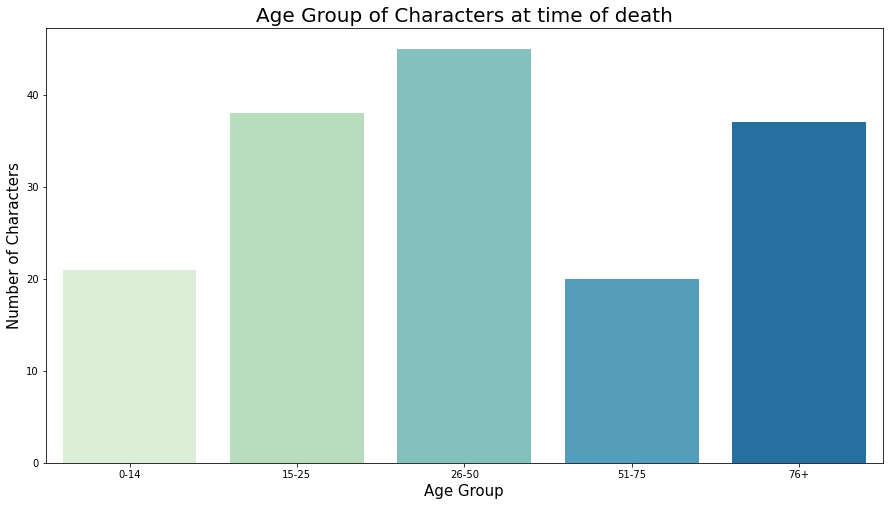

In [46]:
#Creating a new df with only age > 0 and isalive = False variables, dropping NaNs
dead_age = death_preds[['age', 'isalive']].dropna().reset_index(drop=True)
dead_age = dead_age[dead_age['isalive'] == False]
dead_age = dead_age[dead_age['age'] >= 0]

#Creating a category for each age range
conditions = [dead_age['age'] <= 14, \
              (dead_age['age'] > 14) & (dead_age['age'] <= 25), \
              (dead_age['age'] > 25) & (dead_age['age'] <= 50), \
              (dead_age['age'] > 50) & (dead_age['age'] <= 75), \
              dead_age['age'] > 75]

choices = [ "0-14", "15-25", "26-50", "51-75", "76+"]
dead_age['age'] = np.select(conditions, choices, 0)
dead_age = dead_age.sort_values(by='age')


count_plot(dead_age, 'Age Group', 'Number of Characters', 'Age Group of Characters at time of death', x='age', hue=None)

As expected, most deaths occurred in the young adult (15-25) to adult (26-50) age groups due to the fact that many deaths seem to have occurred during battle.

### 5. Logistic Regression Model
#### A. Standard Model
We will now create a Logistic Regression model on this dataset to classify dead and alive characters. The independent variables will be taken as all the variables that have no NaNs. While it is possible to use the other columns with imputed values, such as age, since there are too many values to impute, we will skip this step.

In [47]:
age_nan = death_preds['age'].isna().sum()
print('There are', age_nan, 'NaNs in the age column out of', len(death_preds), 'total entries.')

There are 1513 NaNs in the age column out of 1946 total entries.


Selecting the response and predictor variables:

In [48]:
y = death_preds['isalive']
X = death_preds[['male', 'numdeadrelations', 'booldeadrelations', \
                 'ismarried', 'isnoble', 'ispopular', 'popularity', \
                 'book1', 'book2', 'book3', 'book4', 'book5']]

Creating the train-test split:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
print('The training set has', len(y_train), 'values, and the testing set has',  len(y_test))

The training set has 1459 values, and the testing set has 487


Fitting the Logistic Regression model and predicting on the test set:

In [50]:
log_m = LogisticRegression(random_state=10)
log_m.fit(X_train,y_train)
preds = log_m.predict(X_test)
prob_estimate = log_m.predict_proba(X_test)

We can also calculate the score as mean accuracy of our classification, and create a confusion matrix to see a summary of our predictions results:

In [51]:
score = (log_m.score(X,y))*100
print('The mean accuracy of the model is', str(round(score,1)) + '%')

The mean accuracy of the model is 76.9%


In [52]:
tn, fp, fn, tp = confusion_matrix(y_test,preds).ravel()
sen = round((tp / (tp+fn))*100, 1)
spec = round((tn / (tn+fp))*100,1)
print(confusion_matrix(y_test,preds))
print('\nThe sensitivity of the model is '+str(sen)+'%, and the specificity is '+str(spec)+'%')

[[ 29  94]
 [ 12 352]]

The sensitivity of the model is 96.7%, and the specificity is 23.6%


1. **Sensitivity** (SN) is calculated as the number of correct positive predictions divided by the total number of positives.
2. **Specificity** (SP) is calculated as the number of correct negative predictions divided by the total number of negatives.

This means our model did a good job at predicting the *True* values, ie the living characters, but performed poorly while predicting dead characters.

Considering the data imbalance which was previously addressed (having a larger dataset of alive characters vs dead ones), this is to be expected.

Finally, let's take a look at the coefficients:

Text(0.5, 1.0, 'Coefficient Significance')

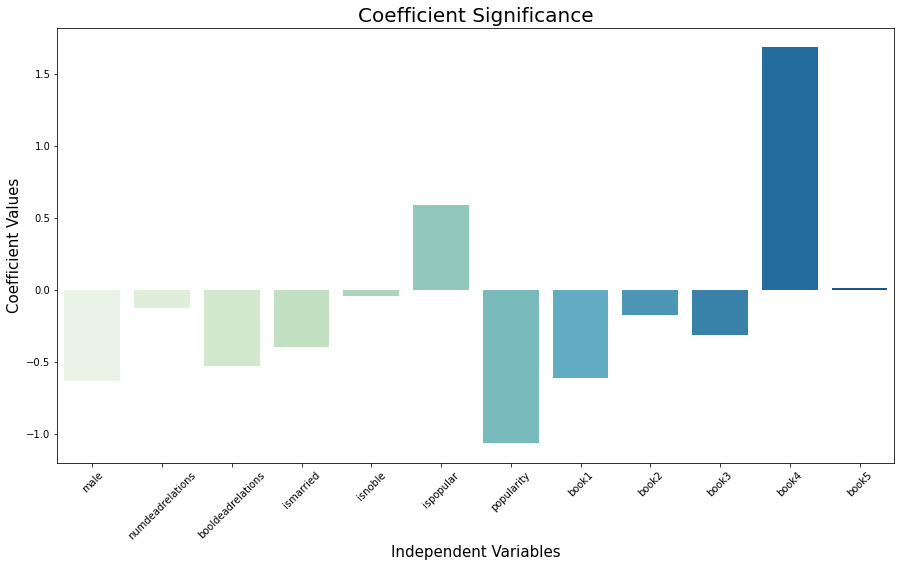

In [53]:
coef_df = pd.DataFrame(list(zip(X_test.columns, log_m.coef_[0])))
plt.figure(figsize=(15,8))
sns.barplot(x=0, y=1, data=coef_df, palette='GnBu')
plt.xlabel('Independent Variables', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Values', fontsize=15)
plt.title('Coefficient Significance', fontsize=20)

As shown above, the variables with the most impact on the classification are **book4** and **popularity** respectively. While book4 has a positive coefficient, meaning characters that appeared in book 4 are most likely to be alive (likely to trend towards *True*), popularity has a negative coefficient, which means as popularity increases, chance of death will also likely increase. Interestingly, the **ispopular** variable has the opposite affect: popular characters are more likely to be alive. This is a contradicting result and bears further investigation. 

Variables with little to no effect on the model appear to be **numdeadrelations**, **isnoble** and **book5**.

#### B. Repeating the model using SMOTE
We can repeat this analysis using SMOTE (*Synthetic Minority Over-sampling Technique*). **SMOTE** is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.

We will do this to improve bias in the minority class (dead characters) and reduce bias in the majority class (alive characters).

In [54]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [55]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.25,random_state=2)
print('The training set has', len(y_train_res), 'values, and the testing set has',  len(y_test_res))

The training set has 2176 values, and the testing set has 726


In [56]:
log_m_res = LogisticRegression(random_state=10)
log_m_res.fit(X_train_res,y_train_res)
preds_res = log_m_res.predict(X_test_res)
prob_estimate_res = log_m_res.predict_proba(X_test_res)

In [57]:
score_res = (log_m_res.score(X,y))*100
print('The mean accuracy of the model is', str(round(score_res,1)) + '%')

The mean accuracy of the model is 66.8%


As we can see, the accuracy of our model has dropped by more than 10%, but let's observe whether there are any changes in sensitivity and specificity:

In [58]:
tn_res, fp_res, fn_res, tp_res = confusion_matrix(y_test_res,preds_res).ravel()
sen_res = round((tp_res / (tp_res+fn_res))*100, 1)
spec_res = round((tn_res / (tn_res+fp_res))*100,1)
print(confusion_matrix(y_test_res,preds_res))
print('\nThe sensitivity of the model is '+str(sen_res)+'%, and the specificity is '+str(spec_res)+'%')

[[253 115]
 [125 233]]

The sensitivity of the model is 65.1%, and the specificity is 68.8%


While the model is now less sensitive, the specificity has improved by a large margin. This means our model is doing a much better job at predicting dead characters.

Finally, we will take a look at the coefficients:

Text(0.5, 1.0, 'Coefficient Significance')

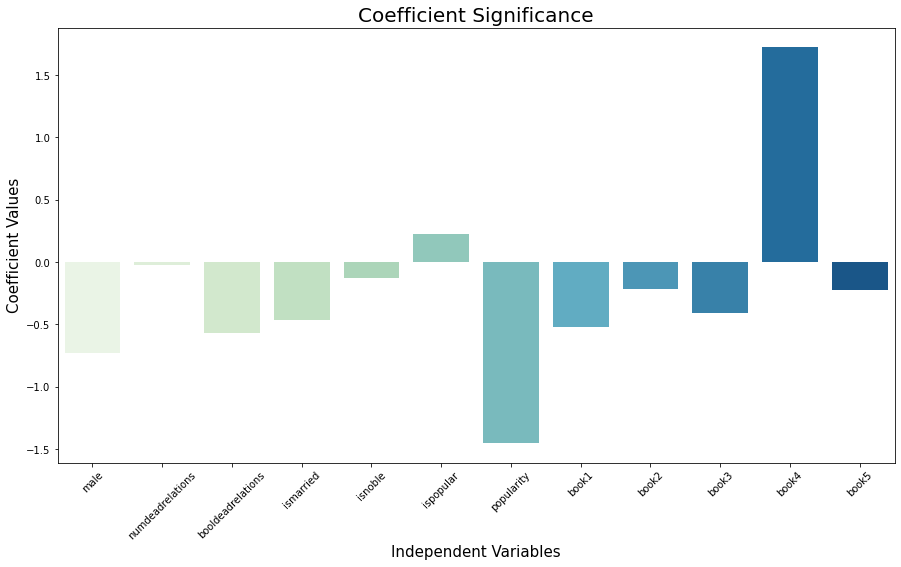

In [59]:
coef_df_res = pd.DataFrame(list(zip(X_test_res.columns, log_m_res.coef_[0])))
plt.figure(figsize=(15,8))
sns.barplot(x=0, y=1, data=coef_df_res, palette='GnBu')
plt.xlabel('Independent Variables', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Values', fontsize=15)
plt.title('Coefficient Significance', fontsize=20)

Oversampling the data has reduced the significance of the **ispopular** variable by a large amount, which indicates that our previous result may have been due to a low sample size of dead characters. The most significant variables are still **book4** and **popularity**, however **male** is also a significant variable.

### 6. Conclusion

To recap, in order to survive in the Game of Thrones universe, our character has to be featured in the fourth book and make sure they are *not* popular (and possibly not a female)! We have also learned a great deal about the world of Game of Thrones in general, such as the fact that Joffrey and Tommen Baratheon are great at winning battles despite being children, or that George R R Martin doesn't discriminate between noble or *not*-noble characters when it comes to killing them.

The main challenges in working with these datasets include their sizes and dealing with the sheer number of NaNs. As this information is scraped from books, missing data is to be expected, however due to the disproportionate number of missing vs available data, imputing data might lead to very low accuracy.

There are many other steps we can take past this point, we can repeat the Logistic Regression model once again by imputing missing values or removing insignificant variables. We can also try other classification models such as SVM, or use clustering to improve our logistic regression model. Additionally, we can do further exploratory data analysis on these three datasets, as there are many factors which have not been explored. 

However, we have achieved satisfactory results with our analyses above, gleaning many insights and achieving fair accuracy, sensitivity and specificity with our second logistic regression model, thus concluding this assignment.

Thank you for reading this far!